# 7 Nov 23 - Activity: The Fast Fourier Transform

We have shown how to decompose a signal using a Fourier series decomposition:

$$V(t) = \sum_{n=-\infty}^{\infty} c_n e^{i n \omega t}$$

where we find the Fourier coefficients $c_n$ by integrating over the period of the signal (performing a Fourier transform of the signal):

$$c_n = \frac{1}{T} \int_0^T V(t) e^{-i n \omega t} dt$$

## Extracting the Fourier coefficients

We wrote some code earlier to perform the Fourier transform of a signal and obtain the coefficients. We will see how to do that using the `scipy` library later, but let's produce these results first without it. We are going to prepare several test signals, but you will need to make more.

### Test Signals

The test signals we are going to use are:

* A sine wave with frequency 10 Hz and amplitude 1 V: $V(t) = A\sin(2 \pi f t)$
* A sum of 3 in-phase sine waves with frequencies 10 Hz, 15 Hz, and 30Hz, with amplitudes, 3V, 2V, and 1V respectively: $V(t) = A_1 \sin(2 \pi f_1 t) + A_2 \sin(2 \pi f_2 t) + A_3 \sin(2 \pi f_3 t)$
* Both of these signals with random noise added to them.

Below we import the libraries we need and define the functions we will use to generate the signals.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [37]:
# Define the functions to create signals
def simple_signal(t, A=1, f=1):
    """Creates a simple sinusoidal signal."""
    return A*np.sin(2 * np.pi * f* t)

def summed_signal(t, A, f):
    """Creates a more complex signal with multiple frequencies."""
    return A[0] * np.sin(2 * np.pi * f[0]*t) + A[1] * np.sin(2 * np.pi * f[1]*t/T0) + A[2]*np.sin(2 * np.pi * f[2]*t)

def noisy_signal(t, A=1, f=1, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t)) 
    return simple_signal(t, A, f) + noise

def noisy_summed_signal(t, A, f, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t))
    return summed_signal(t, A, f) + noise

Let's create those signals and plot them.

In [38]:
# Set the sample rate and time
dt = 0.0005  # Sampling frequency
T0 = 0.1 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

fsimple = 10
Asimple = 1

f = np.array([10, 15, 30])
A = np.array([3, 2, 1])

simple = simple_signal(t, Asimple, fsimple)
summed = summed_signal(t, A, f)

simple_noise = 0.1
summed_noise = 0.8

noisy = noisy_signal(t, Asimple, fsimple, simple_noise)
noisy_summed = noisy_summed_signal(t, A, f, summed_noise)

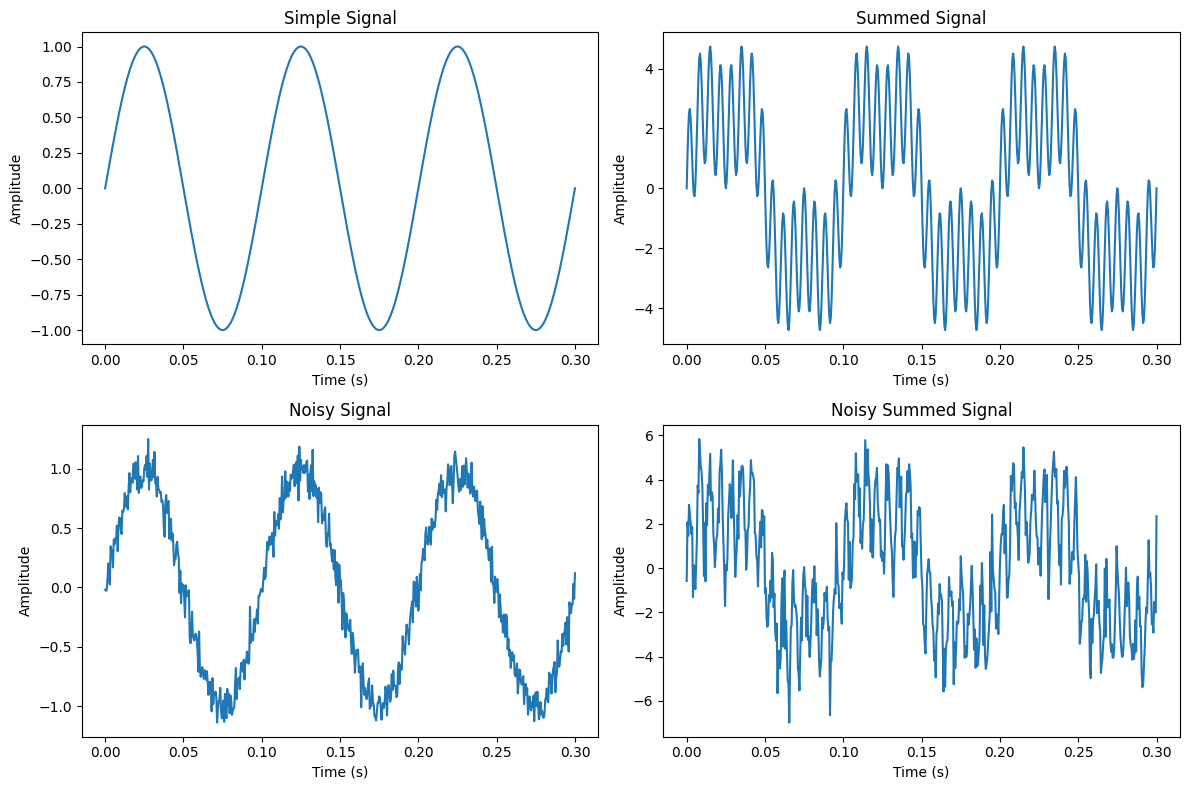

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, simple)
plt.title('Simple Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, summed)
plt.title('Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, noisy)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, noisy_summed)
plt.title('Noisy Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()

### Find the Fourier Components

**&#9989; Do this**

* Using your code from the previous activity, write a function that takes in a signal and returns the Fourier coefficients.  You may want to copy and paste your code from the previous activity.
* Plot the Fourier coefficients as a function of frequency.  You may want to copy and paste your code from the previous activity.
* What do you notice? Can you recover information about the original signal from the Fourier coefficients?
* What pitfalls could you run into? Think about the Nyquist frequency/sampling rate.



In [56]:
# Set the sample rate and time
dt = 0.0005  # Sampling frequency
T0 = 0.1 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

fsimple = 10
Asimple = 1

f = np.array([10, 15, 30])
A = np.array([3, 2, 1])

simple = simple_signal(t, Asimple, fsimple)
summed = summed_signal(t, A, f)

simple_noise = 0.1
summed_noise = 0.8

noisy = noisy_signal(t, Asimple, fsimple, simple_noise)
noisy_summed = noisy_summed_signal(t, A, f, summed_noise)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the Fourier coefficient
def compute_cn(v, n, T, f0):
    omega = 2 * np.pi * f0
    x = np.linspace(0, T, len(v))
    cn = 1/T * np.trapz(v * np.exp(-1j * n * omega * x), x, 0.01)
    return cn

# Fourier series expansion using complex form
def complex_fourier_series_expansion(v, t, T, N):
    f0 = 1 / T
    series = np.zeros_like(t, dtype=complex)
    cns = np.zeros(2*N+1, dtype=complex)
    for n in range(-N, N+1, 1):
        series += compute_cn(v, n, T, f0) * np.exp(1j * n * 2 * np.pi * f0 * t)
        cns[n+N] = compute_cn(v, n, T, f0)
    return series.real, cns

# Define the square wave signal
# T = 2 * np.pi  # Period
# def v(t):
#     return square(t)


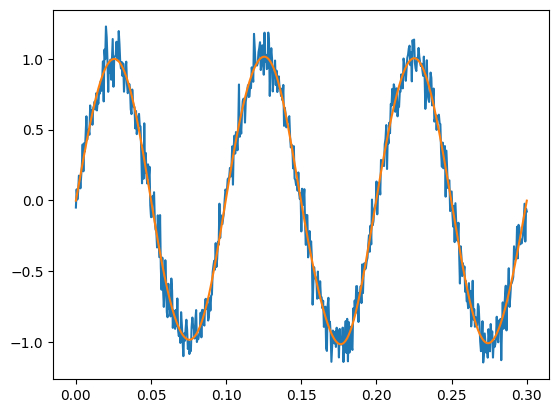

In [64]:
N = 10
plt.plot(t, noisy, label='Original')
series, cns = complex_fourier_series_expansion(noisy, t, T, N)
plt.plot(t, series , label='Fourier series expansion')
# plt.title('Fourier series expansion of square wave signal')
# plt.legend()

Text(0, 0.5, 'magnitude cn')

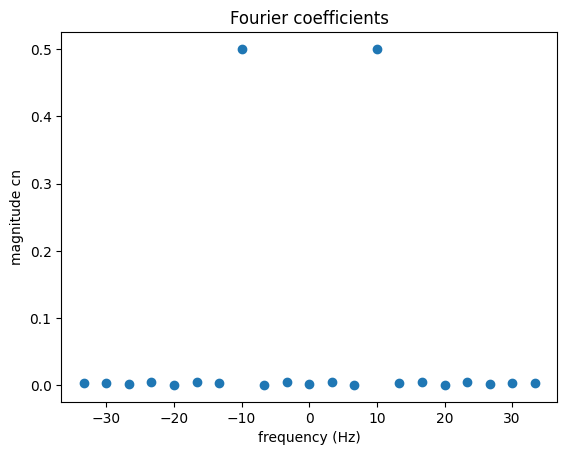

In [65]:
plt.scatter(np.arange(-N, N+1, 1) / T , np.abs(cns))
plt.title('Fourier coefficients')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude cn')

## The Discrete Fourier Transform

One of the issues about the decomposition we have done is that it assumes the signal is periodic. In practice, we often have signals that are not periodic. For example, consider the signal below, which is a wave packet that is not periodic. This signal is still of interest to us and can often contain useful physics. But the techniques we have used so far will not work for this signal.

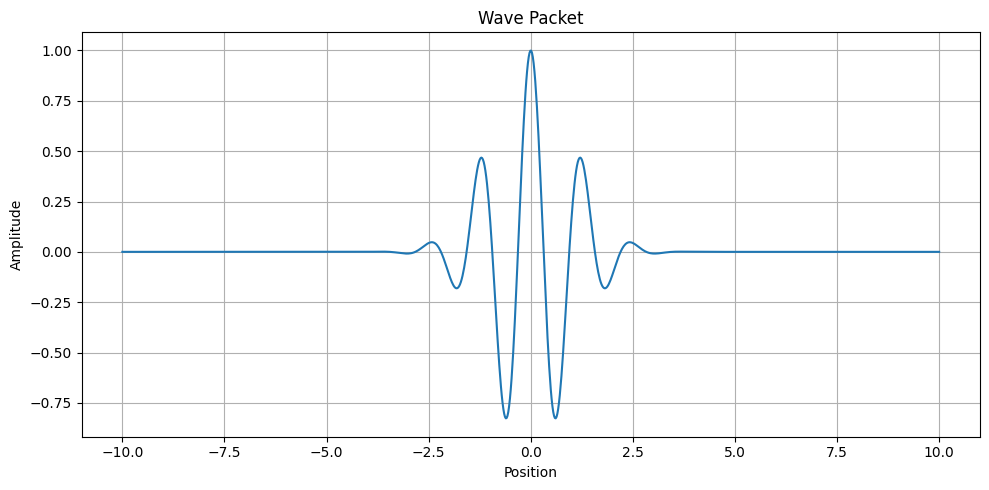

In [66]:
# Define the wave packet parameters
k0 = 5  # central wavenumber
x0 = 0  # initial position
spread = 1  # spread of the packet

# Create a space vector
x = np.linspace(-10, 10, 1000)

# Define the wave packet function
def wave_packet(x, k0, x0, spread):
    return np.exp(-0.5 * ((x - x0) / spread) ** 2) * np.cos(k0 * x)

# Calculate the wave packet
psi = wave_packet(x, k0, x0, spread)

# Plot the wave packet
plt.figure(figsize=(10, 5))
plt.plot(x, psi)
plt.title('Wave Packet')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

### Enter the Discrete Fourier Transform

The [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) is a way to decompose a signal into a sum of sinusoids, but it does not require the signal to be periodic. You can think of it as a discretization of the processes we developed earlier. The expansion of the signal is still as it was before, but we understand it represents a finite number of samples of the signal:

$$V(t) = \sum_{n=0}^{N-1} c_n e^{i n \omega t}.$$

However, we now understand that the signal is only defined at discrete times $t_n = n \Delta t$ where $\Delta t$ is the time between samples. We can then write the Fourier coefficients as:

$$c_n \approx \frac{1}{T_0} \sum_{k=0}^{N-1} V(t_k)e^{-i n \omega t_k} \Delta t$$

where $V(t_k)$ is the value of the signal at time $t_k$ and $T_0 = N \Delta t$ is the total time of the signal.

### Assumptions

In doing this, we are not creating a tool that will always work. We note a few important assumptions and caveats:

1. **Periodicity**: The DFT assumes that the input signal is periodic and that the period is exactly the length of the sample window. This means that the finite sequence of data points provided to the DFT is one period of a periodic signal that repeats indefinitely.

2. **Discrete Samples**: The signal being transformed is assumed to be sampled at discrete intervals. The DFT operates on these discrete samples and does not account for any data between the samples.

3. **Finite Duration**: The DFT is designed to handle signals of finite duration. The signal is assumed to have a finite number of samples, which is the number of points in the DFT.

4. **Equally-Spaced Samples**: The samples are assumed to be evenly spaced in time (or space, depending on the context of the signal). This uniform spacing is critical because non-uniformly spaced samples would require a different transform, such as the Non-uniform Discrete Fourier Transform (NDFT).

## The Fast Fourier Transform

While we can use the DFT directly, the FFT is more efficient and has become the standard way to perform these analyses. The code to have `scipy` perform the FFT is pretty simple. But there's many things to understand about the FFT and a variety of ways to produce spurious and incoherent results. Let's use the simple signal we have above to make go through an analysis.

### The FFT in `scipy`

We start by importing the libraries. Then we need to:

1. Define the time array
2. Define the signal
3. Perform the FFT using `scipy.fft`
4. Plot the coefficients
5. Plot the power spectrum

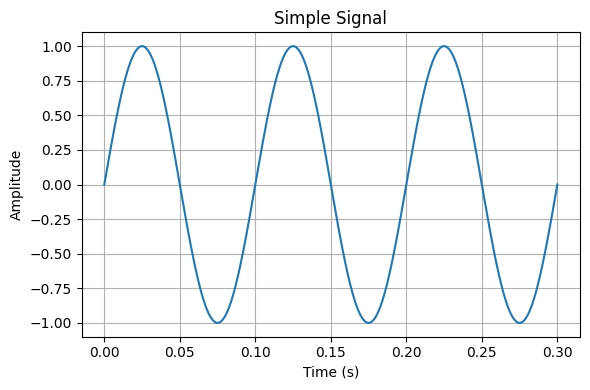

In [44]:
from scipy.fftpack import fft, fftfreq

# Set the sample rate and time
dt = 0.0005  # Sampling frequency
T0 = 0.1 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

fsimple = 10
Asimple = 1

simple = simple_signal(t, Asimple, fsimple)
plt.figure(figsize=(6, 4))
plt.subplot(1, 1, 1)
plt.plot(t, simple)
plt.title('Simple Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid()

### Computing and plotting Fourier Coefficients

We now use `fft` to calculate the Fourier transform of the signal and `fftfreq` to calculate the frequencies associated with the transform. This is a standard way to do this analysis, but the most common mistakes involve the frequencies. Because it is a real signal, we don't worry about the negative frequencies, they are duplicate information. 

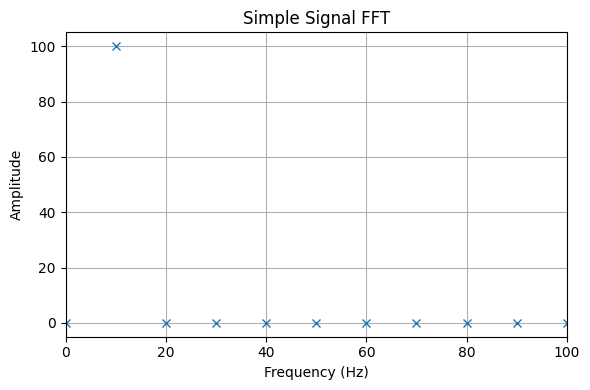

In [45]:
t_cycle = np.arange(0, T0, dt)  # Time points
simple = simple_signal(t_cycle, Asimple, fsimple)

transformed_simple = fft(simple)
freqs = fftfreq(len(simple), dt)

plt.figure(figsize=(6, 4))
plt.plot(freqs, np.abs(transformed_simple), 'x')
plt.xlim(0,100)

plt.title('Simple Signal FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.grid()

### The Power Spectrum

It is far more common to plot these kinds of diagrams in terms of their normalized power spectrum. Here we really only care about the relative strengths of the peaks and not their values. We want to know how much more of something there is and not as much about how much exactly. This lets us build conceptual intuition for these spectra.

So instead of plotting the Fourier coefficients, we plot the power spectrum, which is the square of the Fourier coefficients. We can add up all the contributions from each frequency to get the total power in the signal and use that to normalize our plot. 


**&#9989; Do this**

1. Write a function to calculate the power spectrum of a signal.  
2. Plot the power spectrum of the signal.  

In [46]:
## Your code here

### Investigating the FFT

Now that you have developed some code and some conceptual understanding of the FFT process, let's investigate some of the more nuanced aspects.

**&#9989; Do this**

1. Complete the power spectrum analysis for the other signals we developed.
2. Investigate what happens when you change frequencies, amplitudes, and noise levels. Make sure to find when:
    * Your signal is not fine grained enough for the analysis (low sampling rate)
    * Your signals have multiple frequencies that are close together (competing frequencies)
    * Your signal has frequencies that are not integer multiples of the sampling rate (aliasing)
3. Develop a power spectrum for a signal that:
    * Has only low frequency components
    * Has only high frequency components
    * Has a beating pattern 
    * is a square wave
    * is a sawtooth wave
    * the wave packet above

Be able to answer the questions for each signal:

* What frequencies are present in the signal?
* What is the relative strength of each frequency?
* How does that tell you about the signal?


In [47]:
## your code here